In [24]:
import pandas as pd
import seaborn as sns

rental19 = pd.read_csv('data/#5. 공공자전거_이용정보(시간대별)/new_ride_data_2019.csv', encoding='cp949')

In [31]:
rental19 = rental19.rename({'Unnamed: 0': 'time'}, axis=1)
rental19.head()

,time,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location
0,2019-01-01 00:00:00,정기권,F,10대,1,41.96,0.38,1630.0,29,458_광화문역 5번출구
1,2019-01-01 00:00:00,정기권,F,20대,1,27.23,0.29,1250.0,7,2159_인헌초교
2,2019-01-01 00:00:00,정기권,F,20대,1,20.18,0.23,980.0,5,1362_보문역6번출구 앞
3,2019-01-01 00:00:00,정기권,F,20대,1,7.48,0.10,420.0,4,3106_홍남교 두바퀴쉼터
4,2019-01-01 00:00:00,정기권,F,20대,1,25.70,0.26,1100.0,7,118_광흥창역 2번출구 앞


In [33]:
rental19.time = pd.to_datetime(rental19.time())

In [56]:
rental19['hour'] = rental19.time.map(lambda x: x.hour)
rental19['date'] = rental19.time.map(lambda x: x.date())

In [57]:
rental19.head()

,time,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,date
0,2019-01-01,정기권,F,10대,1,41.96,0.38,1630.0,29,458_광화문역 5번출구,0,2019-01-01
1,2019-01-01,정기권,F,20대,1,27.23,0.29,1250.0,7,2159_인헌초교,0,2019-01-01
2,2019-01-01,정기권,F,20대,1,20.18,0.23,980.0,5,1362_보문역6번출구 앞,0,2019-01-01
3,2019-01-01,정기권,F,20대,1,7.48,0.10,420.0,4,3106_홍남교 두바퀴쉼터,0,2019-01-01
4,2019-01-01,정기권,F,20대,1,25.70,0.26,1100.0,7,118_광흥창역 2번출구 앞,0,2019-01-01


In [58]:
rental = rental19.copy()[(rental19.sex.notnull())]

In [59]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7327561 entries, 0 to 14719884
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   time         datetime64[ns]
 1   rental_code  object        
 2   sex          object        
 3   age          object        
 4   usage        int64         
 5   calories     float64       
 6   carbon       float64       
 7   distance     float64       
 8   usage_time   int64         
 9   location     object        
 10  hour         int64         
 11  date         object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 726.8+ MB


In [69]:
rental['agecode'] = rental.age.map({'10대': '10s', 
                '20대':'2~30s', '30대':'2~30s', 
                '40대':'4~50s', '50대':'4~50s',
                '60대': '6~70s', '70대': '6~70s'})

<AxesSubplot:xlabel='hour', ylabel='Density'>

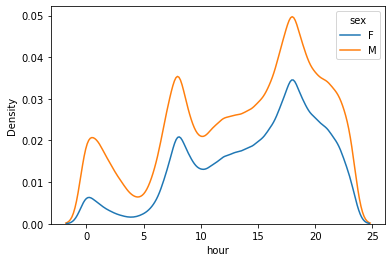

In [65]:
# 성별에 다른 이용시간 패텅 차이

sns.kdeplot(x='hour', hue='sex', data=rental, bw_adjust=2)

<AxesSubplot:xlabel='hour', ylabel='Density'>

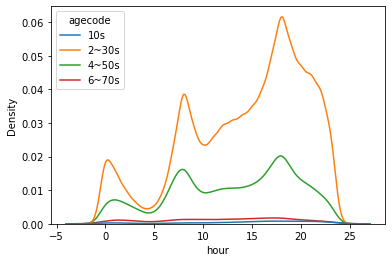

In [70]:
# 연령대에 따른 이용시간 패턴 차이

sns.kdeplot(x='hour', hue='agecode', data=rental, bw_adjust=2)

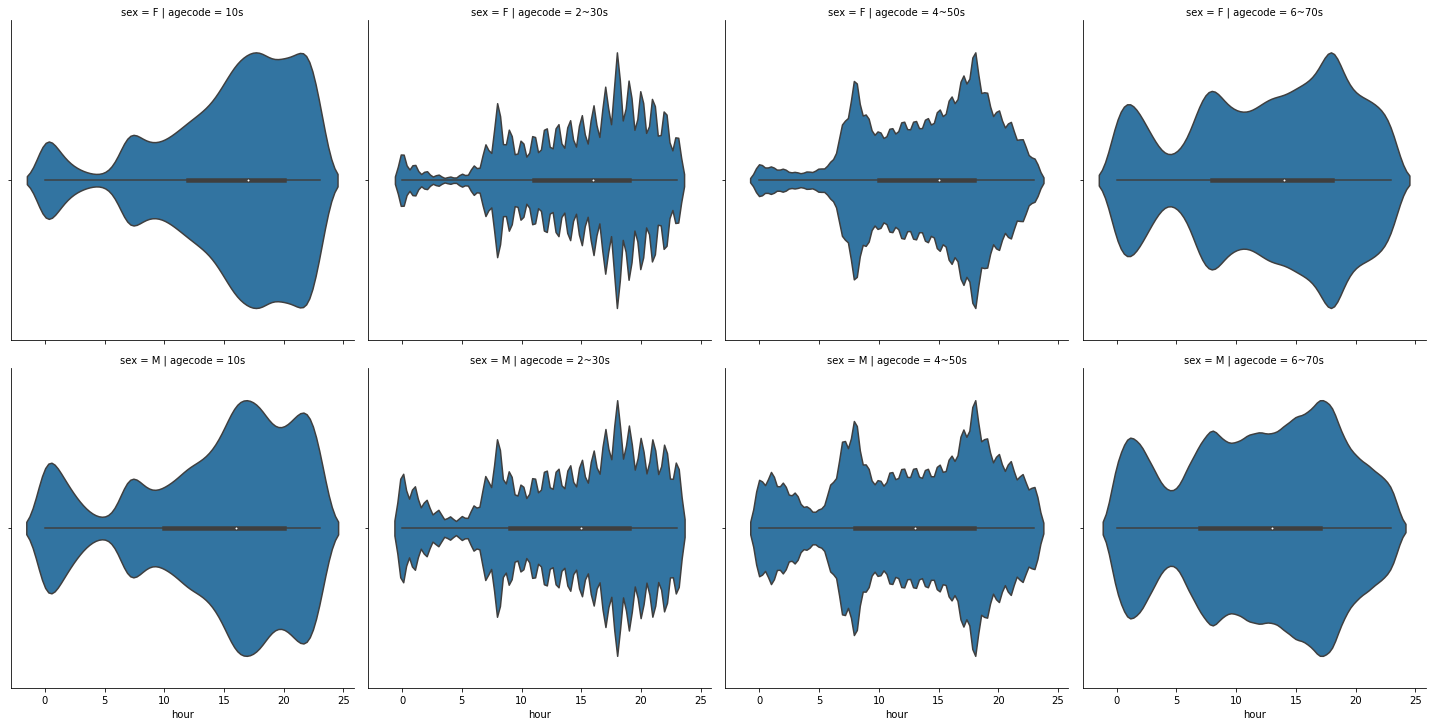

In [71]:
# 성별, 연령대별 이용시간대 분포

sns.catplot(x='hour', col='agecode', row='sex', data=rental, kind='count')

In [82]:
# 이동거리 10키로미터 미만
criteria = rental.usage.eq(1) & rental.distance.lt(10000) & rental.usage_time.lt(200)

<AxesSubplot:xlabel='distance', ylabel='Density'>

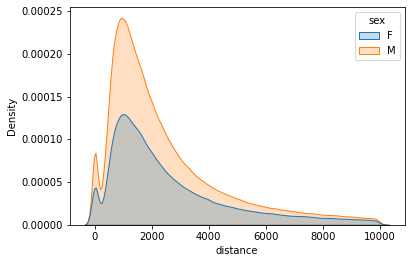

In [75]:
sns.kdeplot(x='distance', hue='sex', data=rental[criteria], fill=True)

<AxesSubplot:xlabel='distance', ylabel='Density'>

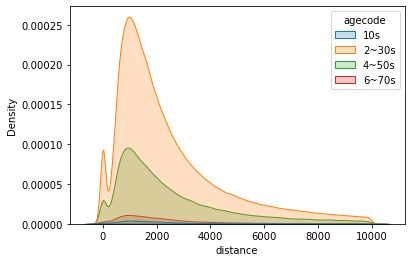

In [77]:
sns.kdeplot(x='distance', hue='agecode', data=rental[criteria], fill=True)

<AxesSubplot:xlabel='usage_time', ylabel='Density'>

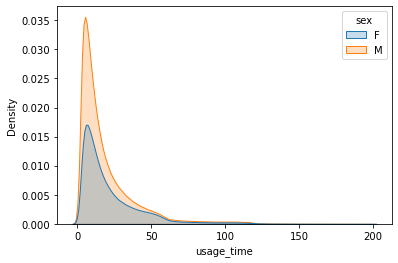

In [83]:
sns.kdeplot(x='usage_time', hue='sex', data=rental[criteria], fill=True)

In [84]:
rental.usage.value_counts()

1     6424801
2      739001
3      116289
4       32773
5        8567
6        3693
7        1282
8         642
9         243
10        138
11         54
12         40
13         16
14         10
16          3
18          3
15          2
17          2
19          1
21          1
Name: usage, dtype: int64